In [ ]:
a.)set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose
and highest Glucose values of this sample and compare these statistics with the population statistics of the same
variable. You should use charts for this comparison.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Loading the data
path = "/Users/balajipavan/Downloads/PDS_Assignment-2/diabetes.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#set the seed
np.random.seed(40)

In [6]:
#taking a random sample of 25 observations
s_25=data.sample(n=25)

In [7]:
# find mean glucose value of sample
mean_glucose_sample = s_25['Glucose'].mean()
print("Mean glucose of Sample:", mean_glucose_sample)

Mean glucose of Sample: 121.2


In [8]:
# find max glucose value of sample
max_glucose_sample = s_25['Glucose'].max()
print("Max glucose of Sample:", max_glucose_sample)

Max glucose of Sample: 184


In [9]:
# find mean glucose value of population
mean_glucose_population = data['Glucose'].mean()
print("Mean glucose of population:", mean_glucose_population)

Mean glucose of population: 120.89453125


In [10]:
# find max glucose value of population
max_glucose_population = data['Glucose'].max()
print("Max glucose of population:", max_glucose_population)

Max glucose of population: 199


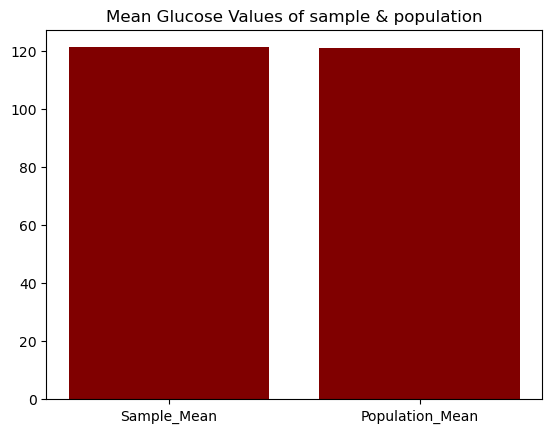

<Figure size 1000x500 with 0 Axes>

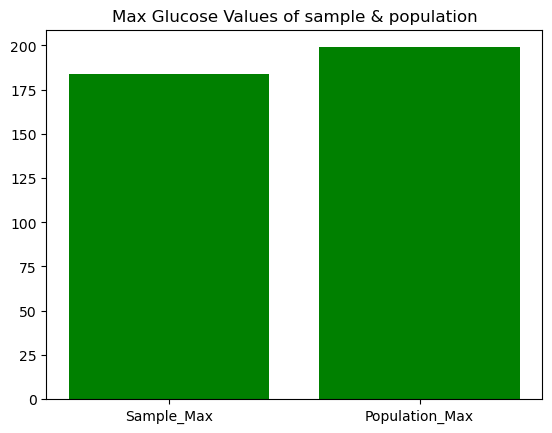

<Figure size 1000x500 with 0 Axes>

In [19]:
# plot the comparison
plt.bar(['Sample_Mean', 'Population_Mean'], [mean_glucose_sample, mean_glucose_population],color='maroon')
plt.title('Mean Glucose Values of sample & population')
fig = plt.figure(figsize = (10, 5))
plt.show()

plt.bar(['Sample_Max', 'Population_Max'], [max_glucose_sample, max_glucose_population],color='green')
plt.title('Max Glucose Values of sample & population')
fig = plt.figure(figsize = (10, 5))
plt.show()

In [ ]:
b.)Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

In [20]:
# 98th percentile BMI of the sample 
Sample_percentile = np.percentile(s_25['BMI'], 98)
print("Sample 98th percentile:", Sample_percentile)

Sample 98th percentile: 47.151999999999994


In [21]:
# 98th percentile BMI of the population
population_percentile = np.percentile(data['BMI'], 98)
print("Population 98th percentile:", population_percentile)

Population 98th percentile: 47.52599999999996


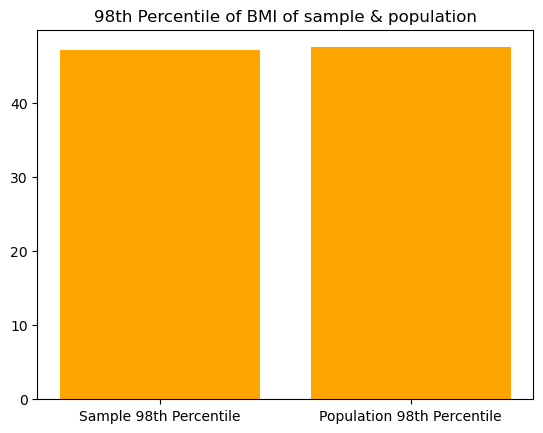

<Figure size 400x500 with 0 Axes>

In [22]:
# plot the comparison
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'], [Sample_percentile, population_percentile], color='orange')
plt.title('98th Percentile of BMI of sample & population')
fig = plt.figure(figsize = (4, 5))
plt.show()

In [ ]:
c.)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the 
average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the 
population for the same variable. Again, you should create charts for this comparison. Report on your findings.

In [23]:
#set the seed
np.random.seed(40)

In [24]:
#  500 samples of 150 observation each from the population
no_of_samples = 500
size = 150
samples = np.random.choice(data['BloodPressure'], size=(no_of_samples, size), replace=True)

In [25]:
# mean, standard deviation, and percentile of BloodPressure of each sample
mean = np.mean(samples, axis=1)
std = np.std(samples, axis=1)
percentile = np.percentile(samples, q=95, axis=1)

In [26]:
# mean, standard deviation, and percentile of BloodPressure of the population
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], q=95)

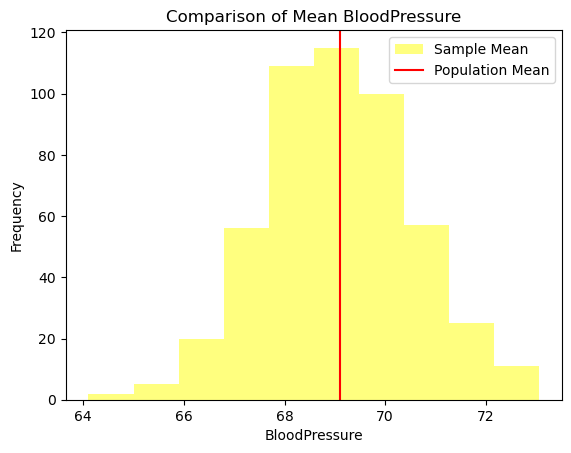

<Figure size 400x500 with 0 Axes>

In [29]:
# plot the comparison of means
plt.hist(mean, alpha=0.5, label='Sample Mean',color='yellow')
plt.axvline(x=population_mean, color='red', label='Population Mean')
plt.legend()
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title('Comparison of Mean BloodPressure')
fig = plt.figure(figsize = (4, 5))
plt.show()

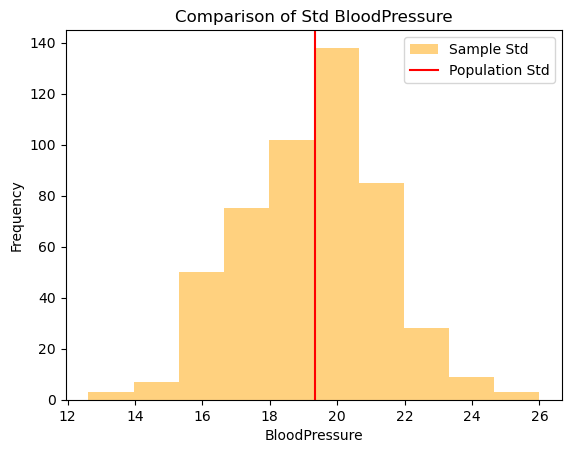

<Figure size 400x500 with 0 Axes>

In [30]:
# plot the comparison of standard deviations
plt.hist(std, alpha=0.5, label='Sample Std',color='orange')
plt.axvline(x=population_std, color='red', label='Population Std')
plt.legend()
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title('Comparison of Std BloodPressure')
fig = plt.figure(figsize = (4, 5))
plt.show()

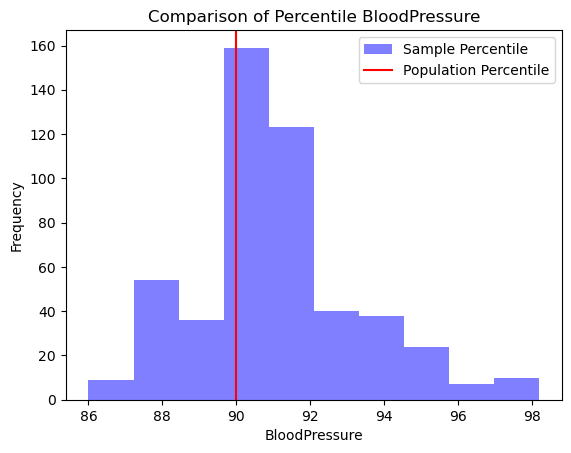

In [32]:
# plot the comparison of percentiles
plt.hist(percentile, alpha=0.5, label='Sample Percentile',color='blue')
plt.axvline(x=population_percentile, color='red', label='Population Percentile')
plt.legend()
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title('Comparison of Percentile BloodPressure')
plt.show()